# Analysing and plotting pyOM data

## Loading the python modules

In [102]:
#import modules
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
from scipy import signal

# equivalent to rcParams['animation.html'] = 'html5'
#rc('animation', html='html5')

## Defining functions for plotting

In [103]:
#define functions for plotting
def animate(i):
    vec = ax.pcolor(v[i,-1,:,:])
    ax.quiver(x,y[:],u[i,-1,:,:],v[i,-1,:,:])
    time_text.set_text('time: %.1f s'%t[i])
    vec = plt.gca()
    return (vec,time_text)

def quiver(x,y,u,v):
    '''makes a quiver plot of a given velocity field'''
    fig, ax = plt.subplots(figsize=(16,8))
    img = ax.pcolor(x,y,v)
    cbar = plt.colorbar(img)
    cbar.set_label('meridional velocity [cm/s]', rotation=270)
    vec = ax.quiver(x,y,u,v,alpha = 0.5)
    plt.title('Velocity Quiver Plot')
    plt.xlabel('Length [cm]')
    plt.ylabel('Width [cm]')
    return fig,ax,vec,img

def animate_quiver(x,y,t,u,v):
    '''Animates A quiver plot of a velocity field'''
    fig, ax,vec = quiver(x,y,u[0,-1,:,:],v[0,-1,:,:])
    anim = animation.FuncAnimation(fig, animate, blit=False, frames = t.shape[0])
    HTML(anim.to_html5_video())
    return anim

def load_data(fname):
    data = xr.open_dataset("C:\\Users\\IngoScr33n\\MSc Ocean Physics\\Ocean Processes\\Experiment\\CDF Files\\"+fname)
    u = np.array(data['u'])*10**2
    v = np.array(data['v'])*10**2
    x = np.array(data['xu'])*10**5
    y = np.array(data['yu'])*10**5
    time = np.array(data['Time'])*10**5
    h = np.array(data['ht'])*10**2
    return x,y,u,v,time,h

#calculate wavelength of rossby wave
def topbeta(u,omega,slope,H0):
    return np.sqrt(4*np.pi**2*u*H0/(2*omega/60*slope*2*np.pi))

def plabeta(u,beta):
    return 2*np.pi*np.sqrt(u/beta)

## Analysis of beta effect in the tank
beta = 10^-4/m*s

expected wavelength: 19.8cm


In [104]:
fname = 'tank_long'
#fname = 'slow_narrow_ridge'
x,y,u,v,t,h= load_data(fname+'.cdf')
h0 = np.max(h)
u0 = 0.001
omega = 15
alpha = 0.2
beta = 10**-4
print(np.nanmax(x))
print(np.nanmax(u))
print(h0)

78.99999618530273
0.1
39.999996


<ipython-input-63-e343bdb29fb6>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolor(x,y,v)


(<Figure size 1152x576 with 2 Axes>,
 <AxesSubplot:title={'center':'Velocity Quiver Plot'}, xlabel='Length [cm]', ylabel='Width [cm]'>,
 <matplotlib.collections.PolyCollection at 0x29c60fa8460>)

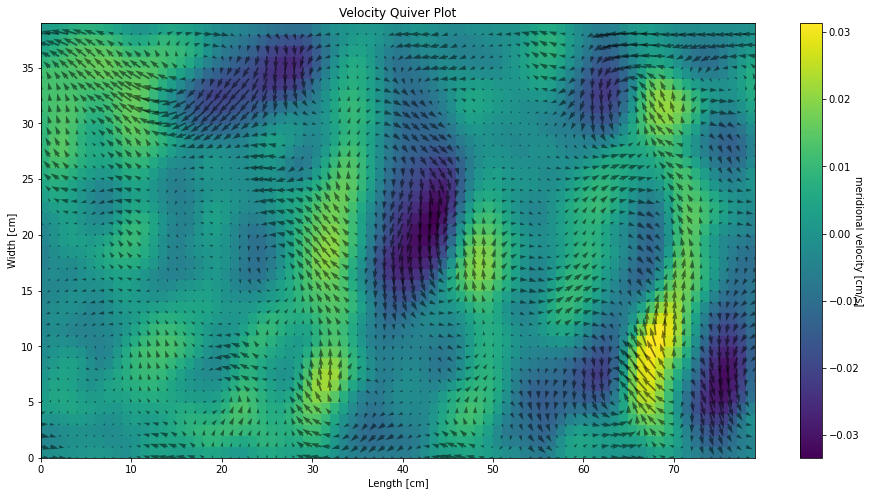

In [65]:
quiver(x,y,u[-1,-1,:,:],v[-1,-1,:,:])

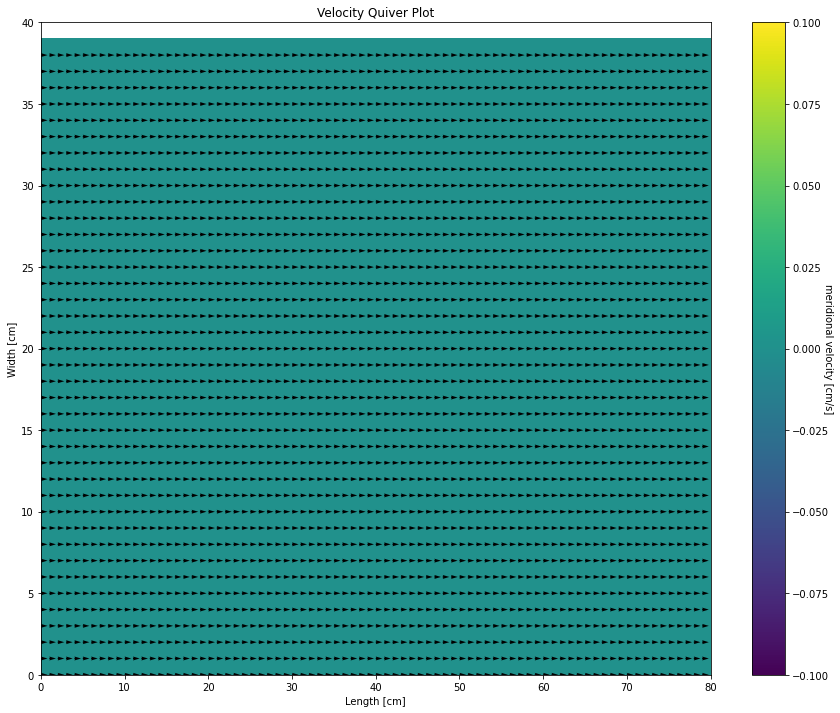

In [68]:
#surface animation
fig, ax = plt.subplots(figsize=(15,12))
vec = ax.pcolor(v[0,-1,:,:])
ax.quiver(x,y[:],u[0,-1,:,:],v[0,-1,:,:])
time_text = ax.text(70,39.386,"",color='r')
cbar = plt.colorbar(vec)
cbar.set_label('meridional velocity [cm/s]', rotation=270)
plt.title('Velocity Quiver Plot')
plt.xlabel('Length [cm]')
plt.ylabel('Width [cm]')
#plt.savefig("Figures\\"+fname+'.png')
anim = animation.FuncAnimation(fig, animate, blit=False,frames=v.shape[0])


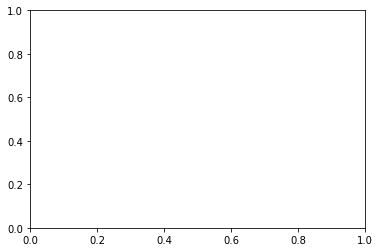

In [48]:
HTML(anim.to_html5_video())
rc('animation', html='html5')
anim


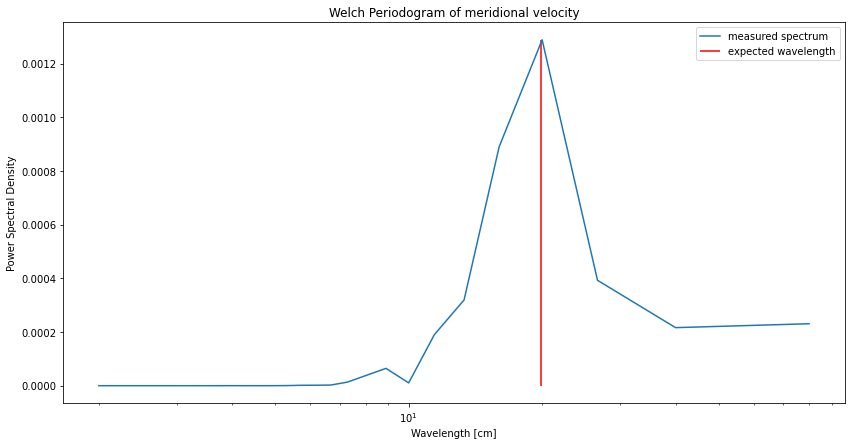

In [105]:
freq,power = signal.welch(np.nanmean(v[-1,-1,:-1,:],axis=0)) #calculate the power spectrum
lambda_ = plabeta(u0,beta) #calculate the expected wavelength, choose either plabeta or topbeta (planetary or topographic)

plt.figure(figsize=(14,7))
plt.semilogx(1/freq[1:],power[1:],label='measured spectrum')
plt.vlines(lambda_,0,max(power),'red',label='expected wavelength')
plt.legend()
plt.xlabel('Wavelength [cm]')
plt.ylabel('Power Spectral Density')
plt.title('Welch Periodogram of meridional velocity')
plt.savefig(fname+'_spec.png')

<ipython-input-54-f3414994a854>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(x,y,np.sqrt(v[-1,-1,:,:]**2+u[-1,-1,:,:]**2))


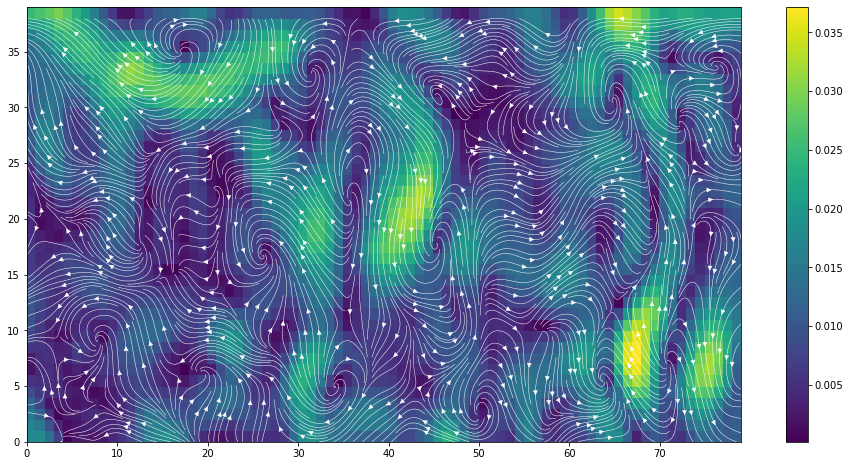

In [54]:
plt.figure(figsize=(16,8))
plt.pcolor(x,y,np.sqrt(v[-1,-1,:,:]**2+u[-1,-1,:,:]**2))
plt.colorbar()
plt.streamplot(x,y,u[-1,-1,:,:],v[-1,-1,:,:],density=5,linewidth=0.5,color='white')
